In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation  # 动图的核心函数
from scipy import stats
sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")

In [78]:
## regplot() & lmplot()
## regplot()
## The functions discussed in this chapter will do so through the common framework of linear regression.
## 在海运过程中，两个主要的函数被用来可视化一个线性关系，通过回归来确定。
## seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1,
## markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True,
## legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000,
## units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None,
## truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)

In [79]:
## Functions to draw linear regression models
## 线性回归为直线

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


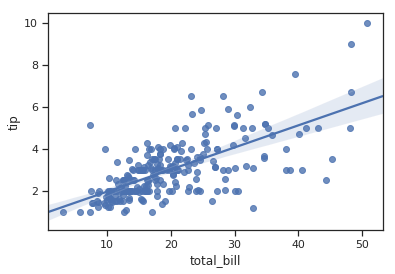

In [80]:
## 在最简单的调用中，两个函数都绘制一个由x和y两个变量组成的散点图，然后拟合回归模型y ~ x，并绘制回归结果的回归直线和该回归的95%置信区间:
## regplot比lm使用范围更广，能接受的数据类型更多。
sns.regplot(x="total_bill", y="tip", data=tips);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


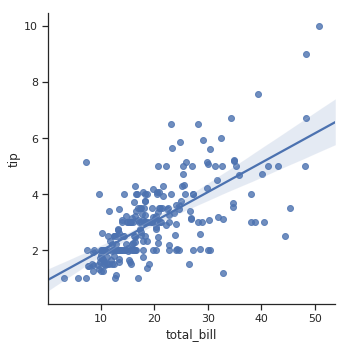

In [81]:
sns.lmplot(x="total_bill", y="tip", data=tips);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


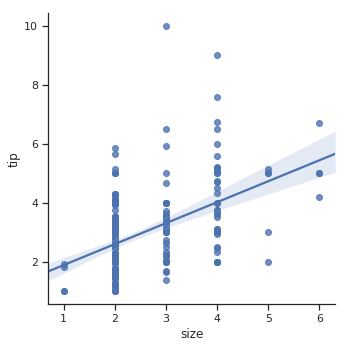

In [82]:
sns.lmplot(x="size", y="tip", data=tips);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


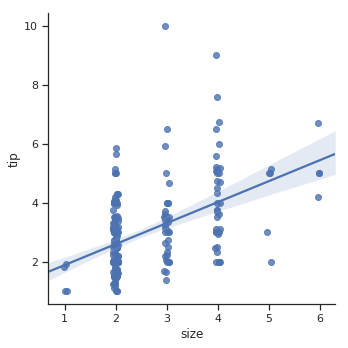

In [83]:
## 在保证拟合曲线不变的情况下，x_jitter增加数据X轴的离散度。y_jitter是数据y轴的离散度
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


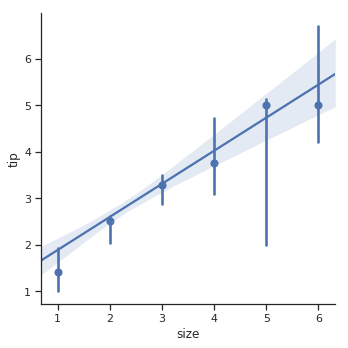

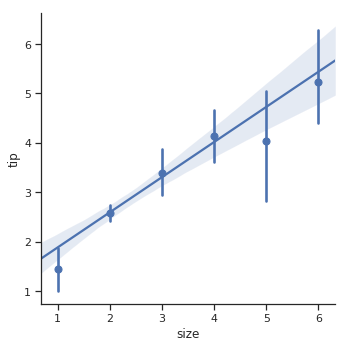

In [84]:
## 第二种选择是将每个离散箱中的观察值进行数据处理，以绘制出中央趋势估计值和置信区间
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.median);
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);
plt.show()

In [85]:
## Fitting different kinds of models
## 拟合不同模型

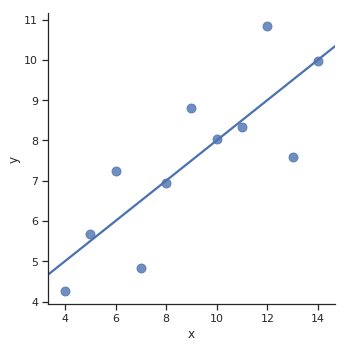

In [86]:
## 安斯科姆 数据集，四组x值的平均数都是9.0，y值的平均数都是7.5；x值的方差都是10.0，y值的方差都是3.75；它们的相关度都是0.816，线性回归线都是y=3+0.5x。
## 单从这些统计数字上看来，四组数据所反映出的实际情况非常相近，而事实上，这四组数据有着天壤之别。使用图形界面一目了然。
## scatter_kws 显示散点，表示点的尺寸。
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

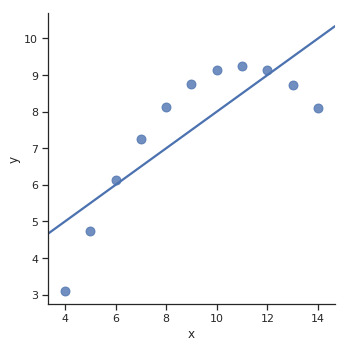

In [87]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

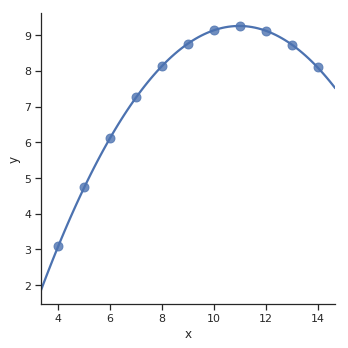

In [88]:
## order大于1时，则用多项式拟合回归。
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=4, ci=None, scatter_kws={"s": 80});

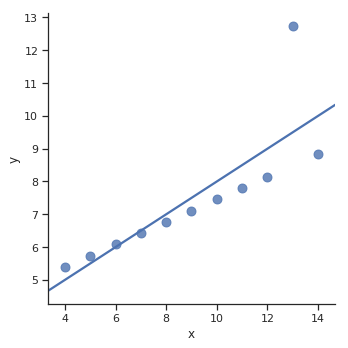

In [89]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

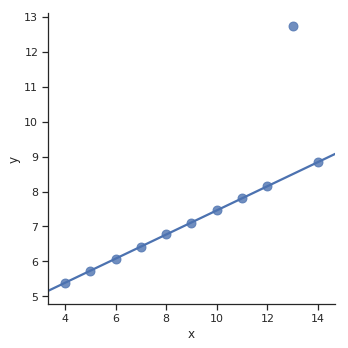

In [90]:
## ci 是置信区间的大小。如果robust 功能开启，将会大大增加计算量，建议ci为0和n_boot（置信区间采样）减少。
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


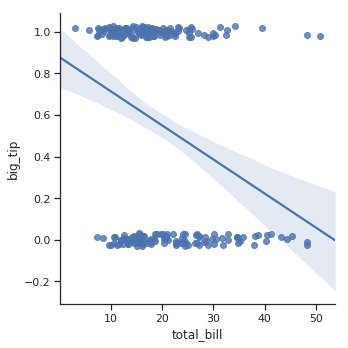

In [91]:
## 大订单的出现，与总账单的金额的关系
## 解决方案是拟合逻辑回归，使回归曲线显示给定x值的y = 1的估计概率
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


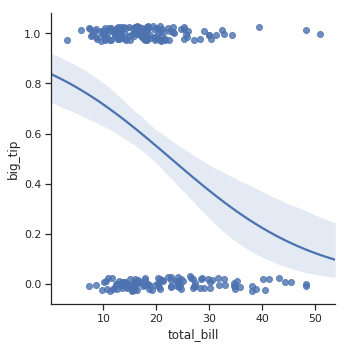

In [92]:
## 使用逻辑回归可以更加有效的描述该场景
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

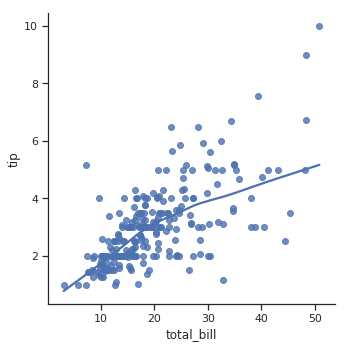

In [93]:
## lowess如果为真，则使用statsmodels来估计非参数lowess模型(局部加权线性回归)。注意，目前无法为这种模型绘制置信区间。
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

In [94]:
## The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. 
## It fits and removes a simple linear regression and then plots the residual values for each observation. 
## Ideally, these values should be randomly scattered around y = 0
## 函数可以作为检查简单回归模型是否适合数据集的有用工具。它拟合并去除一个简单的线性回归，然后绘制每个观测值的残差。理想情况下，这些值应该随机分布在y = 0附近。

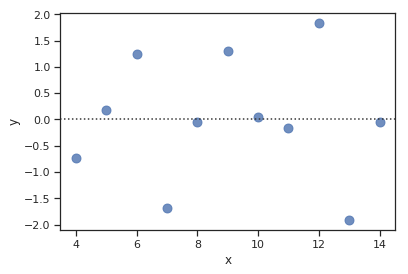

In [95]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

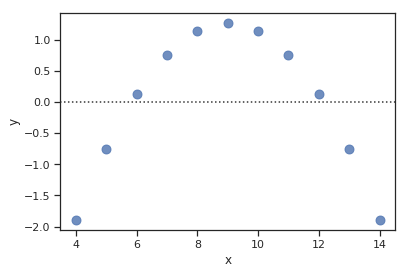

In [96]:
## 如果残差中存在结构，说明简单线性回归是不合适的。
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

In [97]:
## Conditioning on other variables

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


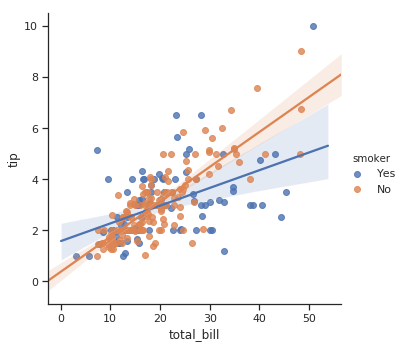

In [98]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


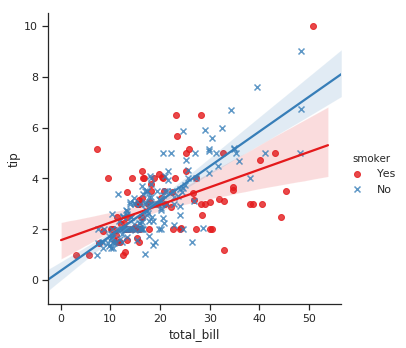

In [99]:
## palette调色板，有内置色彩方案。markers表示数据点的描述方式。
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


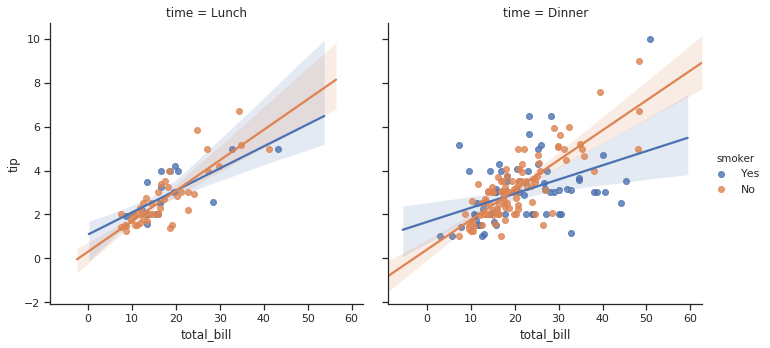

In [100]:
## 取不同时间下的数据作图。col表示选取的数据列表。
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


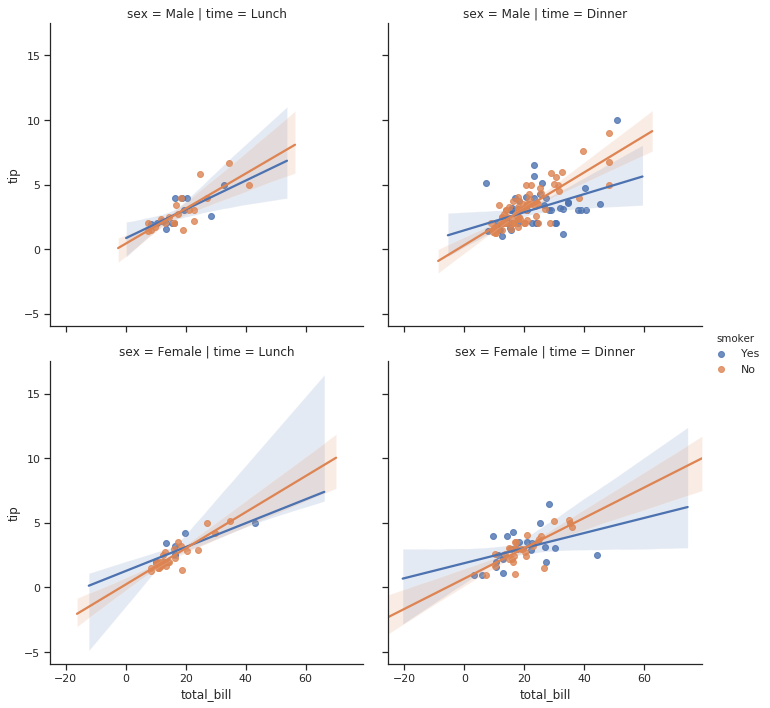

In [101]:
## 对time和sex进行交叉区分
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

In [102]:
## Controlling the size and shape of the plot

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


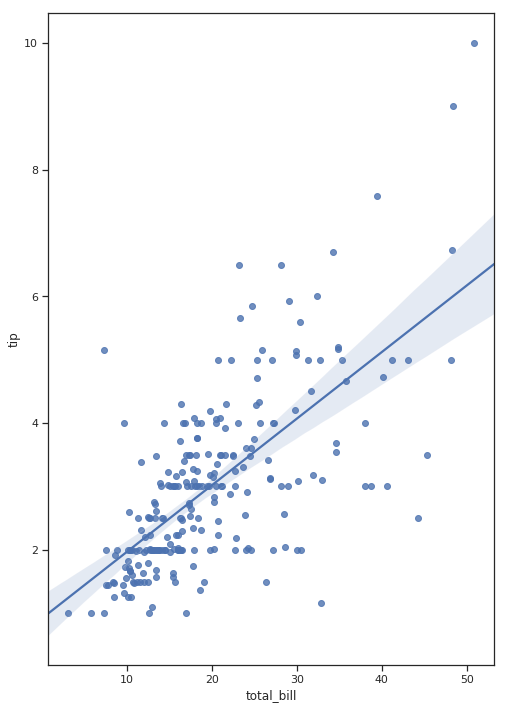

In [103]:
f, ax = plt.subplots(figsize=(8, 12))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


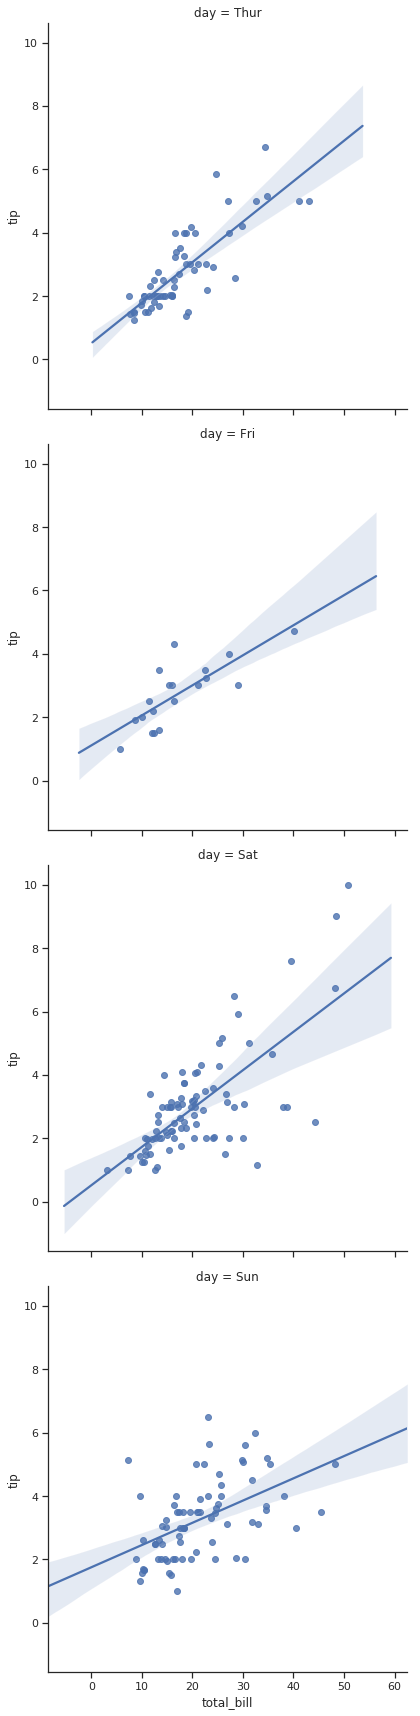

In [104]:
## col_wrap 表示一行几图。height为图标尺寸。
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=1, height=6);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


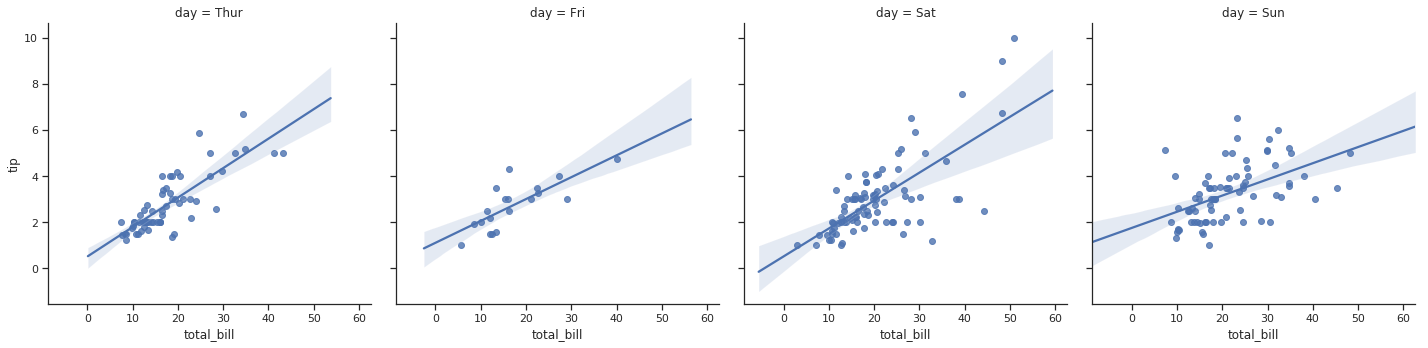

In [105]:
## aspect表示每个面宽高比。
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=1);

In [106]:
## Plotting a regression in other contexts

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


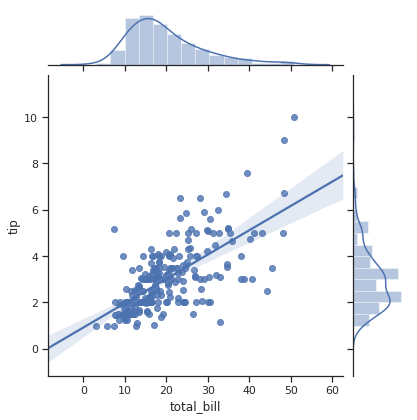

In [107]:
## seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True,
## xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
## 直接封装每个轴的拟合曲线
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


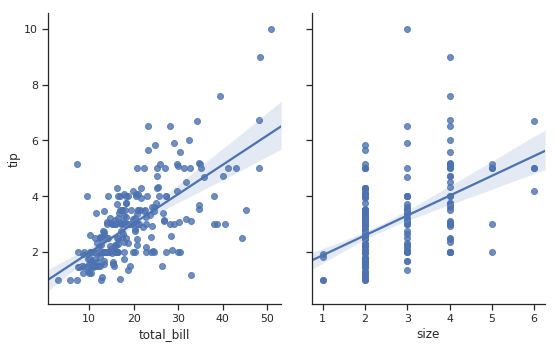

In [108]:
## 使用 x_vars和y_vars获得所需画布
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


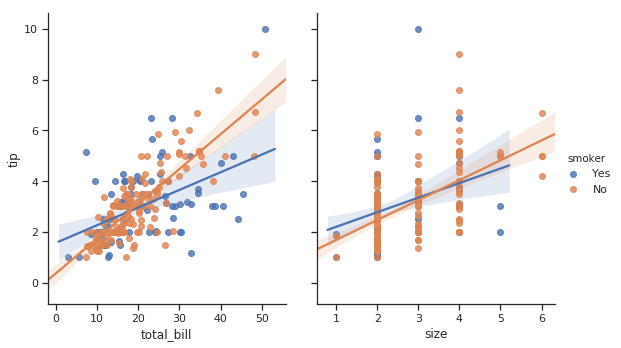

In [109]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


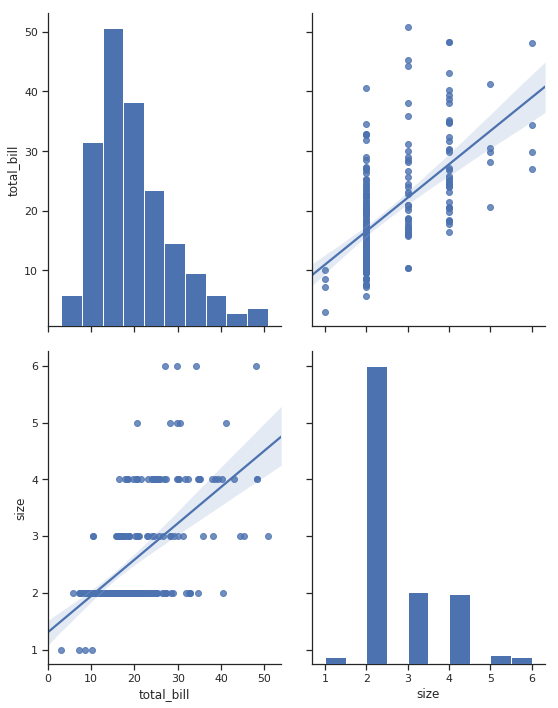

In [114]:
## 自动生成相关性矩阵 diag_kind 表示对角所用图形有 auto，hist，kde。kind为非对角图形所用轴线类型，有‘scatter’, ‘reg’。
sns.pairplot(tips, vars=["total_bill", "size"],
             height=5, aspect=.8, kind="reg",diag_kind="auto");